In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import LocalOutlierFactor

In [2]:
# 0 in the class is Normal customer and 1 refers to fraud or anamoly.  
file = pd.read_csv('/home/ashish/Downloads/anamoly/creditcard.csv')
file.head()
#Vn are the PCA derived features. The original features of the dataset are not shared for the confidentiality issues.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,69.99,0


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150546 entries, 0 to 150545
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    150546 non-null  int64  
 1   V1      150546 non-null  float64
 2   V2      150546 non-null  float64
 3   V3      150546 non-null  float64
 4   V4      150546 non-null  float64
 5   V5      150546 non-null  float64
 6   V6      150546 non-null  float64
 7   V7      150546 non-null  float64
 8   V8      150546 non-null  float64
 9   Amount  150546 non-null  float64
 10  Class   150546 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 12.6 MB


In [4]:
file.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,Amount,Class
count,150546.00000,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000
mean,54334.95618,-0.242036,0.039531,0.626892,0.129117,-0.250373,0.071944,-0.103488,0.056959,89.142542,0.001946
std,22065.73941,1.819657,1.610356,1.290054,1.340863,1.310506,1.287251,1.163327,1.234732,242.949391,0.044074
min,0.00000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-31.764946,-73.216718,0.000000,0.000000
25%,39045.00000,-1.024740,-0.545986,0.122467,-0.727354,-0.884107,-0.673049,-0.597827,-0.138688,5.760000,0.000000
50%,55980.00000,-0.268193,0.117673,0.720359,0.152973,-0.289954,-0.186799,-0.052573,0.075789,22.790000,0.000000
75%,72850.00000,1.161222,0.801489,1.345525,0.978178,0.277323,0.459355,0.428137,0.372959,79.415000,0.000000
max,93631.00000,2.401777,18.902453,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,19656.530000,1.000000


In [5]:
file.shape

(150546, 11)

In [6]:
file.isna().sum().sum()

0

In [7]:
file['Class'].unique()

array([0, 1])

Text(0.5, 1.0, 'Transaction Class Distribution')

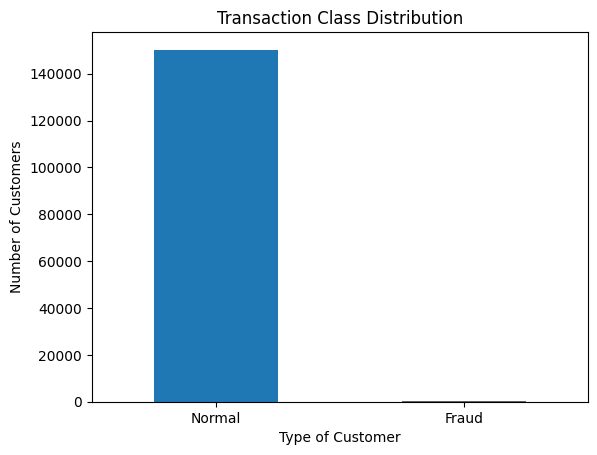

In [8]:
#Analysing the customers who fraud
file['Class'].value_counts().plot(kind = 'bar', rot = 0)
plt.xlabel('Type of Customer')
plt.xticks(range(2), ['Normal','Fraud'])
plt.ylabel('Number of Customers')
plt.title('Transaction Class Distribution')

In [9]:
fraud_customers = file['Class'].value_counts()[1]/file['Class'].value_counts()[0]*100
print("Percentage of Fraud Customers {} %".format(fraud_customers))

Percentage of Fraud Customers 0.1950044258683687 %


In [10]:
fraud = file[file['Class']==1]
normal = file[file['Class']==0]

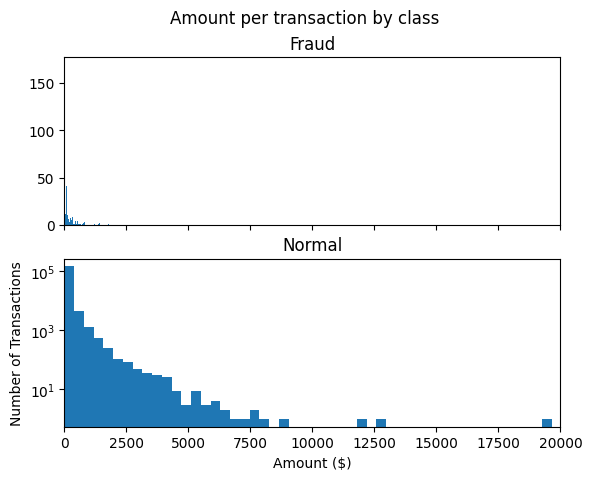

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

Analysing this graph reveals that most of the customers who fraud are who took small loans from the bank through their credit card which is upto $1000. One of the analysis from this can be that these are poor people who took loan for some of their needs and were not able to repay it. 

Isolation Forest Algorithm

In [12]:
cols = [c for c in file.columns if c not in ['Class']]
features = file[cols]
target = file['Class']
classifier = IsolationForest(n_estimators=100, max_samples=len(features),contamination=fraud_customers,random_state=42, verbose=0)
classifier.fit(features)
score_pred = classifier.decision_function(features)
ypred = classifier.predict(features)
ypred[ypred ==1] =0
ypred[ypred== -1] =1
print("Isolation Forest Algorithm")
print("accuracy score",accuracy_score(target, ypred))
print("Report",classification_report(target, ypred))

/home/ashish/anaconda3/envs/mldl/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest Algorithm
accuracy score 0.8062519097153029
Report               precision    recall  f1-score   support

           0       1.00      0.81      0.89    150253
           1       0.01      0.82      0.02       293

    accuracy                           0.81    150546
   macro avg       0.50      0.81      0.45    150546
weighted avg       1.00      0.81      0.89    150546



This model can precit with 80% accuracy that given the parameters, if a customer will fraud the bank or not. 